# MODULE 4 - BRIEF

In [1]:
from dotenv import load_dotenv

import sys; sys.path.insert(0, '..')
from scripts.data import get_conn

import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# OPEN SNOWFLAKE CONNECTION AND RETRIEVE TRANSFORMED DATA

In [2]:
# Snowflake login information
load_dotenv("snowflake.env")
# Reusing the function with connector to Snowflake.
conn = get_conn()

In [3]:
cur = conn.cursor()
# In this case executing command to select all rows from table word
cur.execute("SELECT * FROM rhetoric.gold.word")

# Retrieve the results of the executed SQL query using the Snowflake cursor and store it in the dataframe
df = cur.fetch_pandas_all()
# Convert input dates or date-like strings into pandas datetime
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'])

### Preparation code for Mentimeter, Top Five %, Top Five No.

In [4]:
# Calculate word frequencies (Mentimeter & Top Five)
word_freq = Counter(' '.join(df['track_name']).lower().split())

# Get the top five word frequencies (Top Five %, Top Five No.)
top_five_words = word_freq.most_common(5)

# Extract top five words and their frequencies with list comprehensions (Top Five % & Top Five No.)
top_words = [word[0] for word in top_five_words]
word_counts = [count[1] for count in top_five_words]

# TRACK NAMES: Word Frequency
## What are the "word" frequencies in track names? Show as mentimeter

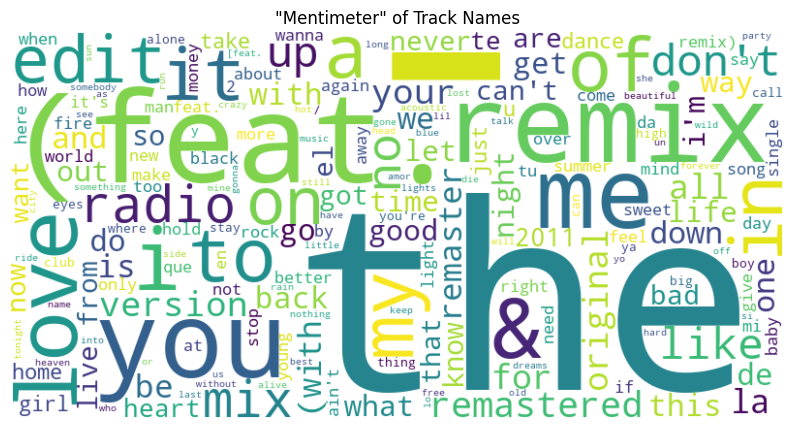

In [5]:
# Generate "Mentimeter"-look-alike
mentimeter = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
# Display the word cloud as "Mentimeter"
plt.figure(figsize=(10, 6))
plt.imshow(mentimeter, interpolation='bilinear')
plt.axis('off')
plt.title('"Mentimeter" of Track Names')
plt.show()

# TRACK NAMES: Top Five
## What are the top five "word" frequencies? Show in percentage as pie chart

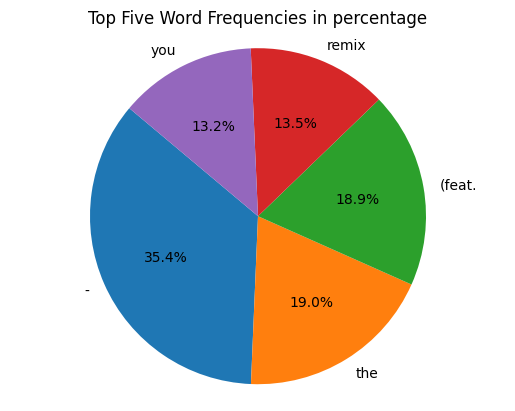

In [6]:
# Create a pie chart for top five word frequencies
plt.pie(word_counts, labels=top_words, autopct='%1.1f%%', startangle=140)
plt.title('Top Five Word Frequencies in percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# TRACK NAMES: Top Five
## What are the top five "word" frequencies shown in numbers as bar chart?

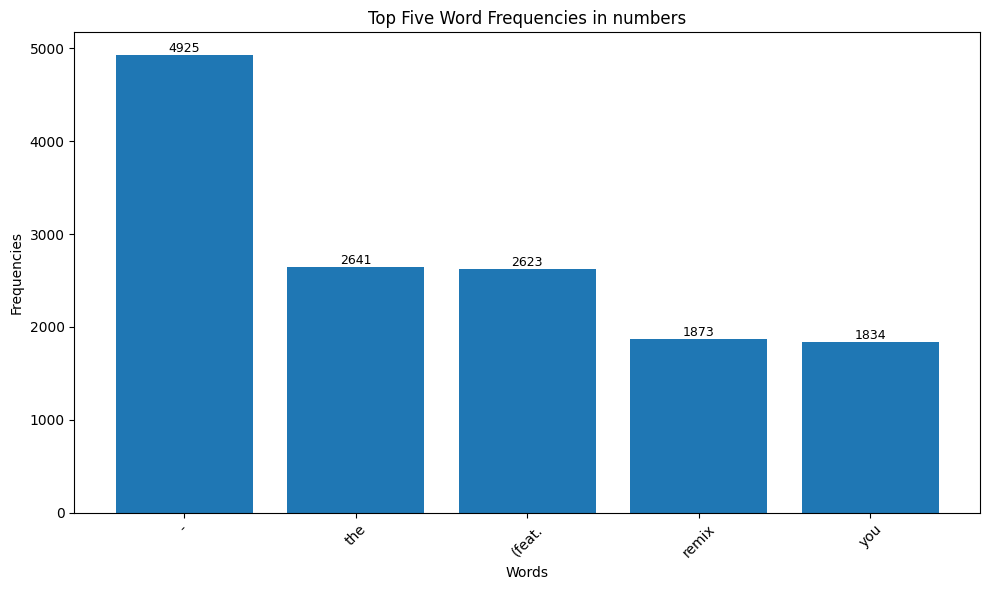

In [7]:
 # Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_words, word_counts)

# Annotating each bar with its frequency
for bar, count in zip(bars, word_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=9)

plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top Five Word Frequencies in numbers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# SPEECHINESS: Playlist Genre
## What is the presence of spoken words in tracks? 
## Visualize by Decade for Each Playlist Genre. Show as lineplot

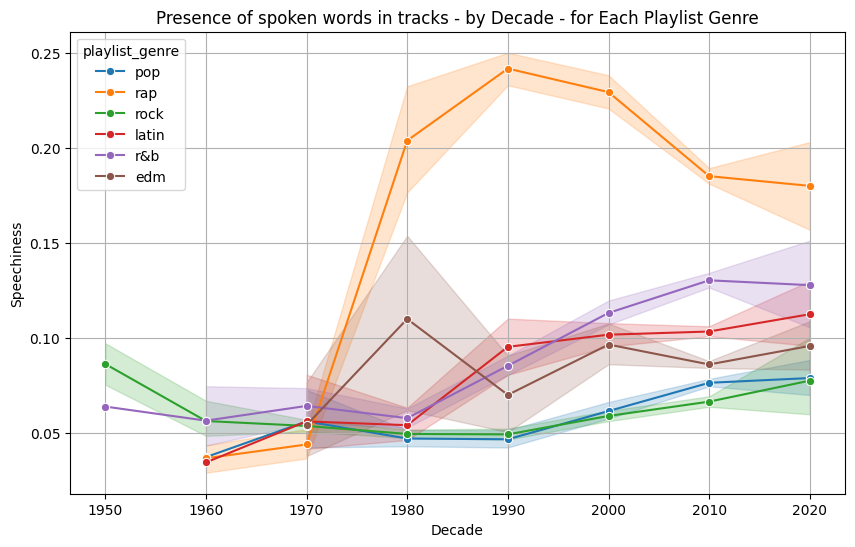

In [8]:
# Extract decade by using integer division '//'
df['decade'] = (df['track_album_release_date'].dt.year // 10) * 10

# Plotting 'speechiness' by decade for each 'playlist_genre' using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='decade', y='speechiness', hue='playlist_genre', marker='o')
plt.title('Presence of spoken words in tracks - by Decade - for Each Playlist Genre')
plt.xlabel('Decade')
plt.ylabel('Speechiness')
plt.grid(True)
plt.show()

# INSTRUMENTALNESS: Playlist Genre
## How big is the lack of spoken words in tracks? 
## Visualize for Each Playlist Genre. Show as horizontal bar plot

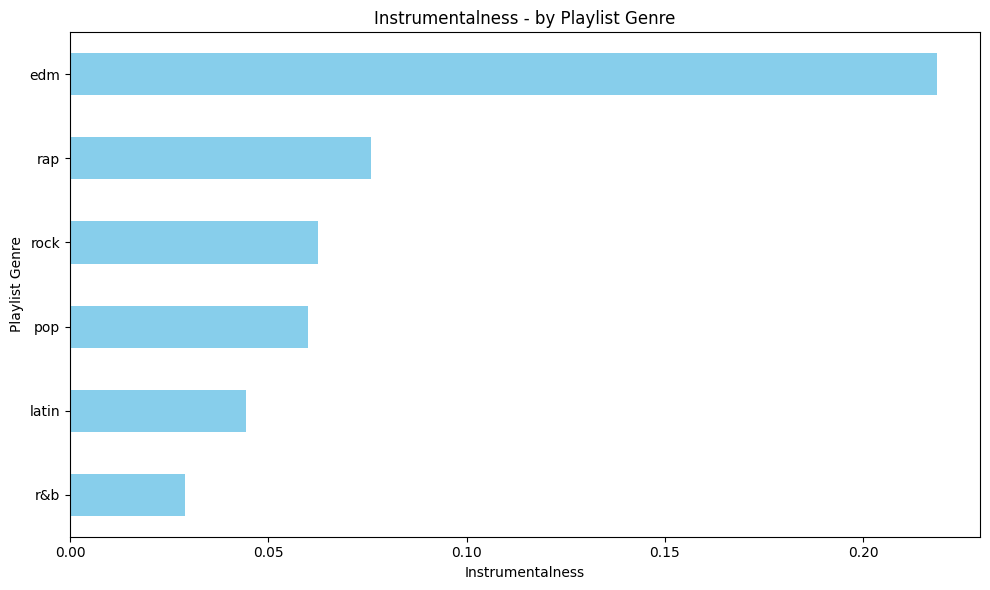

In [9]:
# Group by 'playlist_genre' and calculate the mean 'instrumentalness'
mean_instrumentalness = df.groupby('playlist_genre')['instrumentalness'].mean().sort_values()

# Plotting the mean 'instrumentalness' values by playlist genre
plt.figure(figsize=(10, 6))
mean_instrumentalness.plot(kind='barh', color='skyblue')
plt.xlabel('Instrumentalness')
plt.ylabel('Playlist Genre')
plt.title('Instrumentalness - by Playlist Genre')
plt.tight_layout()
plt.show()


# CLOSE SNOWFLAKE CONNECTION

In [10]:
cur.close()
conn.close()